In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils 
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./input/Shakespeare_data.csv')
df.head(1)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I


In [7]:
import csv

corpus = []

with open('./input/Shakespeare_data.csv') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)        # to pass first row,header
    for row in reader:
        corpus.append(row[5])
        
print(len(corpus))
print(corpus[:3])

111396
['ACT I', 'SCENE I. London. The palace.', 'Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others']


In [9]:
import string

def text_cleaner(text):
    text = "".join(car for car in text if car not in string.punctuation).lower()
    text = text.encode("utf8").decode("ascii",'ignore')
    return text

corpus = [text_cleaner(line) for line in corpus]


In [11]:
# Tokenization is the process of splitting up a text into a list of individual words, or tokens.
# corpus is too big if you try with all data, you can see this message
# Your notebook tried to allocate more memory than is available. It has restarted.
corpus = corpus[:5000]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
total_words

5411

In [13]:
# create input sequences using list of tokens
input_sequences =[]

for sentence in corpus:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        

In [15]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, 
                                         maxlen=max_sequence_len, 
                                         padding='pre')) # as laste value is label.padding method is 'pre'

In [17]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
# create one-hot encoding of the labels
label = tensorflow.keras.utils.to_categorical(label, num_classes=total_words)

In [19]:
print(label[0])
print(label[0].shape)

[0. 0. 0. ... 0. 0. 0.]
(5411,)


In [21]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(512)))
model.add(Dropout(0.3))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
 history = model.fit(predictors, label, epochs=50,  verbose=1)

Epoch 1/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 194s 187ms/step - accuracy: 0.0305 - loss: 7.0578
Epoch 2/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 194s 189ms/step - accuracy: 0.0420 - loss: 6.5340
Epoch 3/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 201s 196ms/step - accuracy: 0.0515 - loss: 6.3323
Epoch 4/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 194s 190ms/step - accuracy: 0.0554 - loss: 6.2031
Epoch 5/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 195s 190ms/step - accuracy: 0.0597 - loss: 6.0520
Epoch 6/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 192s 187ms/step - accuracy: 0.0668 - loss: 5.8728
Epoch 7/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 198s 193ms/step - accuracy: 0.0737 - loss: 5.6153
Epoch 8/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 202s 197ms/step - accuracy: 0.0916 - loss: 5.3266
Epoch 9/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 183s 178ms/step - accuracy: 0.1016 - loss: 5.0301
Epoch 10/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 197s 192ms/step - accuracy: 0.1283 - loss: 4.6777
Epoch 11/50
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 172s 167ms/step - accuracy: 0.1705 -

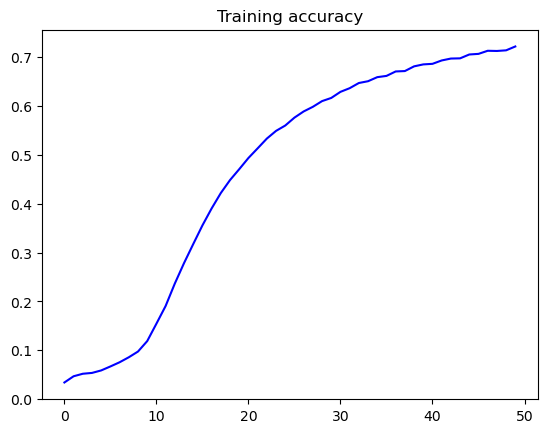

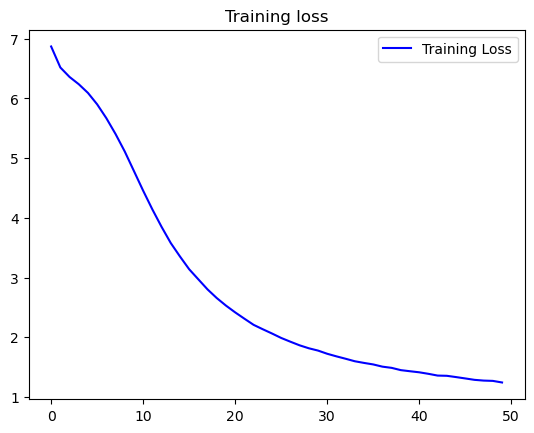

In [25]:
# plotting training accuracy and loss over 50 epoches

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [143]:
    # Convert the seed text to a sequence of integers
    # Pad the sequence to the required length
    # Use model.predict to get the probability distribution for the next word
    # Get the indices of the top_n highest probabilities
    # Retrieve the words corresponding to the top_n indices

def predict_next_word_options(model, tokenizer, seed_text, max_sequence_len, top_n=5):
  
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    predicted_probs = model.predict(token_list, verbose=0)[0]

   
    top_n_indices = np.argsort(predicted_probs)[-top_n:][::-1]
    
    
    word_options = [word for word, index in tokenizer.word_index.items() if index in top_n_indices]
    return word_options

# Take user input for seed text, next words, and top_n
seed_text = input("Enter the seed text: ")
next_words = int(input("How many words do you want to predict? "))
top_n = int(input("How many suggestions should be shown for each word? "))

# Generate predictions
for _ in range(next_words):
    word_options = predict_next_word_options(model, tokenizer, seed_text, max_sequence_len, top_n) 
    print(f"Seed text: '{seed_text}'")
    print(f"Options for the next word: {word_options}\n")
    seed_text += " " + word_options[0]


# Print the final generated text
print(f"Final generated text: {seed_text}")


Enter the seed text:  long live the
How many words do you want to predict?  1
How many suggestions should be shown for each word?  5


Seed text: 'long live the'
Options for the next word: ['king', 'god', 'duke', 'noble', 'madcap']

Final generated text: long live the king


In [107]:
 # Save your model in HDF5 format
model.save('lstm_model.h5') 


In [139]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

# After training, save your tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
